# LAB: Visualización

## Introducción

El objetivo de este LAB es aplicar los conceptos aprendidos de visualización. Observaremos un dataset que contiene información de los resultados de una maratón. La información está desagregada para corredor del maratón.

Los campos que contiene son:
1. age
2. gender
3. split: tiempo que tardó en correr la primera mitad de la maratón
4. final: tiempo que tardó en correr la maratón completa

### 1- Importar 
Importar el archivo marathon.csv e inspeccionar los primeros casos y los tipos de datos.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('./marathon.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [8]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

### 2- Trabajar con fechas
Importar el archivo marathon.csv e inspeccionar los primeros casos.
Aplicar la siguiente función a los campos que correspondan para trabajar con "TimeDeltas"

```(python)
def convert_time(s):
        h, m, s = map(int, s.split(':'))
        return pd.Timedelta(hours=h, minutes=m, seconds=s)```

In [3]:
def convert_time(s):
        h, m, s = map(int, s.split(':'))
        return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [9]:
data['split'] = data['split'].apply(convert_time)
data['final'] = data['final'].apply(convert_time)

Al castear timedeltas como enteros, nos devuelven un valor expresado en milisegundos, la mínima unidad que se encuentra representada en un timedelta.

Intentemos ahora crear columnas con los segundos que tardo cada corredor en el split y en el final.

In [13]:
data['last_lap'] = data['final'] - data['split']
data.dtypes

age                   int64
gender               object
split       timedelta64[ns]
final       timedelta64[ns]
last_lap    timedelta64[ns]
dtype: object

### 3 - Graficar

Veamos la relación entre splt_sec y final_sec con un jointplot

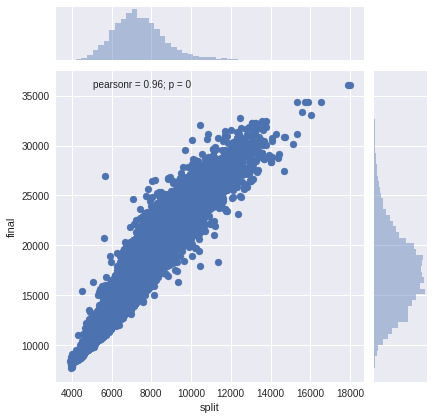

In [23]:
splt_sec = data['split'].apply(lambda x: x.seconds)
final_sec = data['final'].apply(lambda x: x.seconds)
sns.jointplot(splt_sec, final_sec)
plt.show()

### 4 - Caracterizar corredores

Los corredores se dividen en dos: los que corren más rápido la primera mitad que la segunda y viceversa. 

Crear una nueva columna para visualizar esta relación:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

Visualizar la distribución de esta nueva variable, dibujando una línea en el eje vertical que separe los valores menores y mayores que cero.


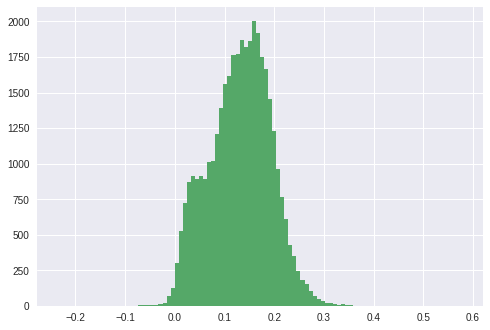

In [25]:
data['splt_sec'] = splt_sec
data['final_sec'] = final_sec
    
data['splt_frac'] = 1 - 2 * data['splt_sec'] / data['final_sec']

plt.hist(data['splt_frac'], bins=100)
plt.show()

¿Cuántos corredores fueron más lento en la primera mitad?

In [37]:
fast = data[data['splt_frac'] < 0]
slow = data[data['splt_frac'] > 0]
slow.sample(10)

,age,gender,split,final,last_lap,splt_sec,final_sec,splt_frac
8047,30,W,01:51:54,03:55:25,02:03:31,6714,14125,0.049345
24842,40,M,01:58:00,05:12:41,03:14:41,7080,18761,0.245243
29770,65,M,02:14:40,05:37:33,03:22:53,8080,20253,0.202094
28926,30,M,02:21:26,05:33:19,03:11:53,8486,19999,0.151358
14027,48,M,01:53:41,04:24:19,02:30:38,6821,15859,0.139794
18665,30,W,02:03:30,04:44:33,02:41:03,7410,17073,0.131963
18894,48,W,02:06:16,04:45:33,02:39:17,7576,17133,0.115625
20907,29,W,02:00:19,04:54:59,02:54:40,7219,17699,0.184248
22214,49,M,02:13:36,05:00:48,02:47:12,8016,18048,0.111702
25909,55,M,02:19:18,05:17:17,02:57:59,8358,19037,0.121920


* Veamos ahora si existe alguna correlación entre esta variable y todas las otras:

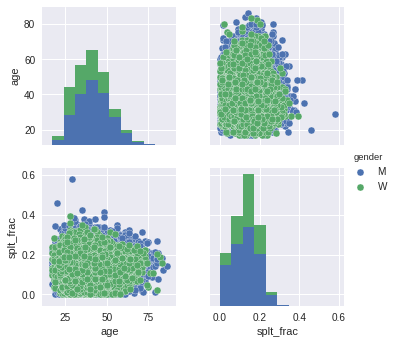

In [40]:
sns.pairplot(slow[['age','gender','splt_frac']], hue='gender')
plt.show()

* Veamos ahora un histograma de las fracciones de split entre hombres y mujeres.

* También podríamos comparar ambas distribuciones usando un boxplot o un violinplot

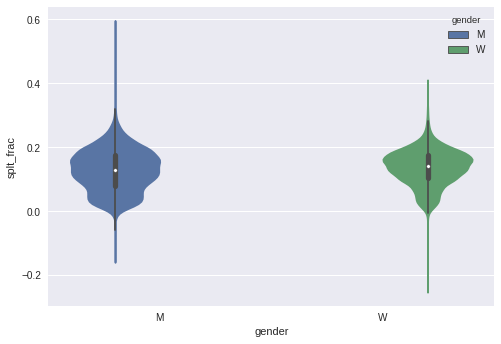

In [65]:
sns.violinplot(x=data['gender'],y=data['splt_frac'],hue=data['gender'])
plt.show()

* Generemos, ahora, este tipo de plots pero como función de la edad.
* Comencemos por crear una nueva columna en el array que especifique la década de edad de la persona (lo que están en "los '30", en "los '40", etc.)

In [58]:
data['decade'] = 10 * (data['age'] // 10)

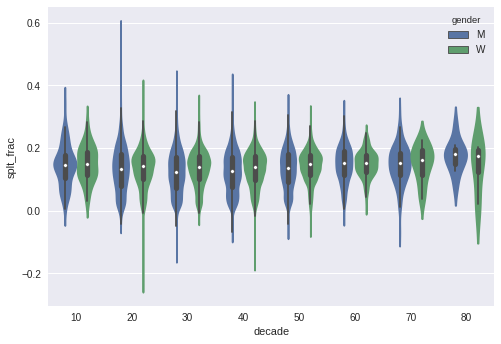

In [64]:
sns.violinplot(x=data['decade'],y=data['splt_frac'],hue=data['gender'])
plt.show()

* ¿Hay correlación con el "split" y con el hecho de haber terminado más rápido la carrera? 